# **CIA** Time Series <br>

---


# **Group Members**<br>

>Aleena Mariya Sebastian(23122104)<br>

> Falak Ansari(23122106)





In [32]:
# Importing necessary libraries for data manipulation, time series analysis, and plotting
import pandas as pd           
import numpy as np            
import statsmodels.api as sm   
import matplotlib.pyplot as plt   
import matplotlib.dates as mdates 
import datetime as dt         
from datetime import datetime  
from pandas import Series      
import seaborn as sns          

# Preprocessing and LSTM model libraries
from sklearn.preprocessing import MinMaxScaler  
from keras.models import Sequential            
from keras.layers import LSTM, Dense, Dropout  

In [33]:
# Reading the CSV file containing the stock data into a DataFrame
df = pd.read_csv("BAJAJFINSV.csv")  # Replace with the actual path to your CSV file

# Printing the contents of the DataFrame to check the data
print(df)

            Date      Symbol Series  Prev Close      Open      High       Low  \
0     26-05-2008  BAJAJFINSV     EQ     2101.05    600.00    619.00    501.00   
1     27-05-2008  BAJAJFINSV     EQ      509.10    505.00    610.95    491.10   
2     28-05-2008  BAJAJFINSV     EQ      554.65    564.00    665.60    564.00   
3     29-05-2008  BAJAJFINSV     EQ      640.95    656.65    703.00    608.00   
4     30-05-2008  BAJAJFINSV     EQ      632.40    642.40    668.00    588.30   
...          ...         ...    ...         ...       ...       ...       ...   
3196  26-04-2021  BAJAJFINSV     EQ     9916.65   9992.00  10125.00   9902.20   
3197  27-04-2021  BAJAJFINSV     EQ    10001.75  10000.00  10133.00   9964.70   
3198  28-04-2021  BAJAJFINSV     EQ    10091.35  10200.00  10615.95  10151.15   
3199  29-04-2021  BAJAJFINSV     EQ    10489.30  10540.00  11300.00  10520.00   
3200  30-04-2021  BAJAJFINSV     EQ    11176.55  11000.00  11225.00  10868.70   

          Last     Close   

In [34]:
# Displaying the first 5 rows of the DataFrame to get a quick overview of the data
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
0,26-05-2008,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726370e+14,908264,0.2888
1,27-05-2008,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,677627,0.1558
2,28-05-2008,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,774895,0.1689
3,29-05-2008,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982920e+14,1006161,0.2225
4,30-05-2008,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945930e+14,462832,0.1514


In [35]:
# Displaying the last 5 rows of the DataFrame to inspect the most recent data
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
3196,26-04-2021,BAJAJFINSV,EQ,9916.65,9992.0,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194160e+14,77816,0.1855
3197,27-04-2021,BAJAJFINSV,EQ,10001.75,10000.0,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441070e+14,77723,0.2267
3198,28-04-2021,BAJAJFINSV,EQ,10091.35,10200.0,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163560e+15,133587,0.1199
3199,29-04-2021,BAJAJFINSV,EQ,10489.30,10540.0,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862820e+15,195324,0.1151
3200,30-04-2021,BAJAJFINSV,EQ,11176.55,11000.0,11225.00,10868.70,11021.00,11041.65,11081.78,835355,9.257220e+14,129995,0.1556


In [36]:
# Getting the shape (number of rows and columns) of the DataFrame
df.shape

(3201, 14)

In [37]:
# Displaying a concise summary of the DataFrame, including the data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3201 non-null   object 
 1   Symbol              3201 non-null   object 
 2   Series              3201 non-null   object 
 3   Prev Close          3201 non-null   float64
 4   Open                3201 non-null   float64
 5   High                3201 non-null   float64
 6   Low                 3201 non-null   float64
 7   Last                3201 non-null   float64
 8   Close               3201 non-null   float64
 9   VWAP                3201 non-null   float64
 10  Volume              3201 non-null   int64  
 11  Turnover            3201 non-null   float64
 12  Deliverable Volume  3201 non-null   int64  
 13  %Deliverble         3201 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 350.2+ KB


In [38]:
# Displaying the list of column names in the DataFrame
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [39]:
# Checking for missing (null) values in each column of the DataFrame
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

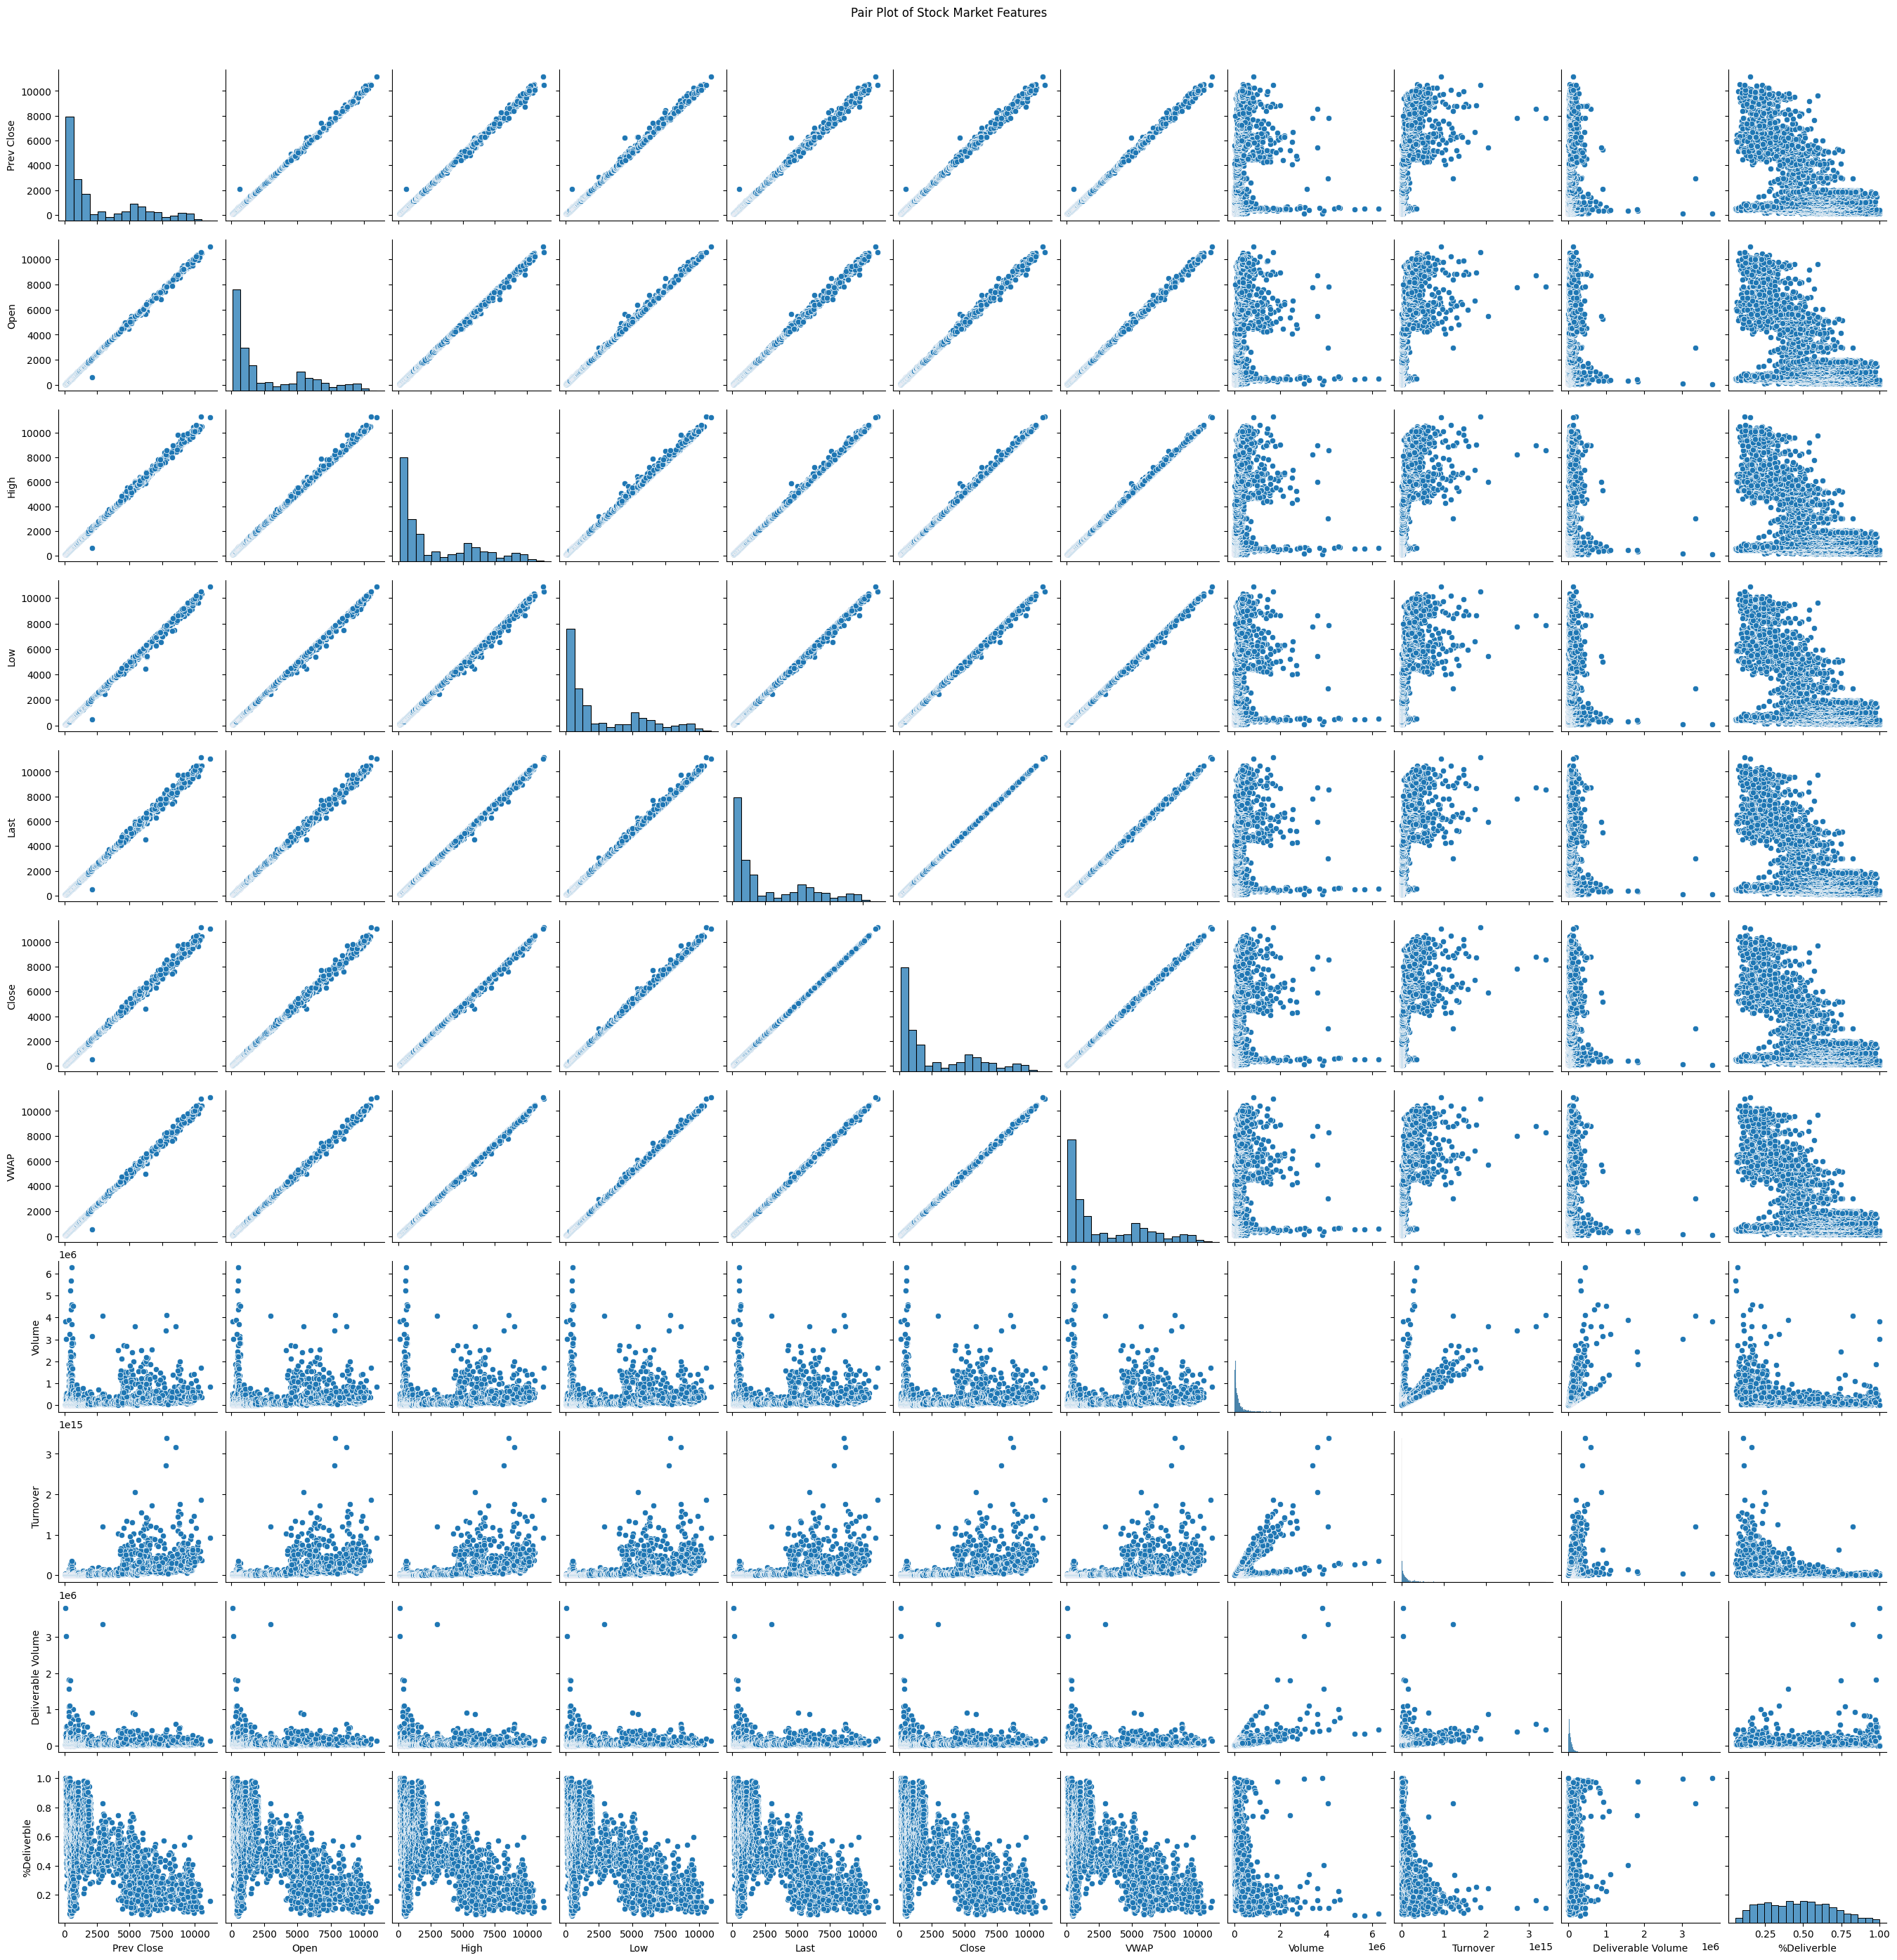

In [40]:
# Creating a pairplot using seaborn for visualizing relationships between multiple features
sns.pairplot(df[['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble']])

# Setting a title for the entire plot
plt.suptitle('Pair Plot of Stock Market Features', y=1.02)  # 'y=1.02' adjusts the title position above the plot

# Displaying the plot
plt.show()

The pairplot helps in visualizing the relationships between different stock market features. This is useful for understanding how variables like Open, Close, and Volume relate to each other and identifying potential correlations before applying predictive models.

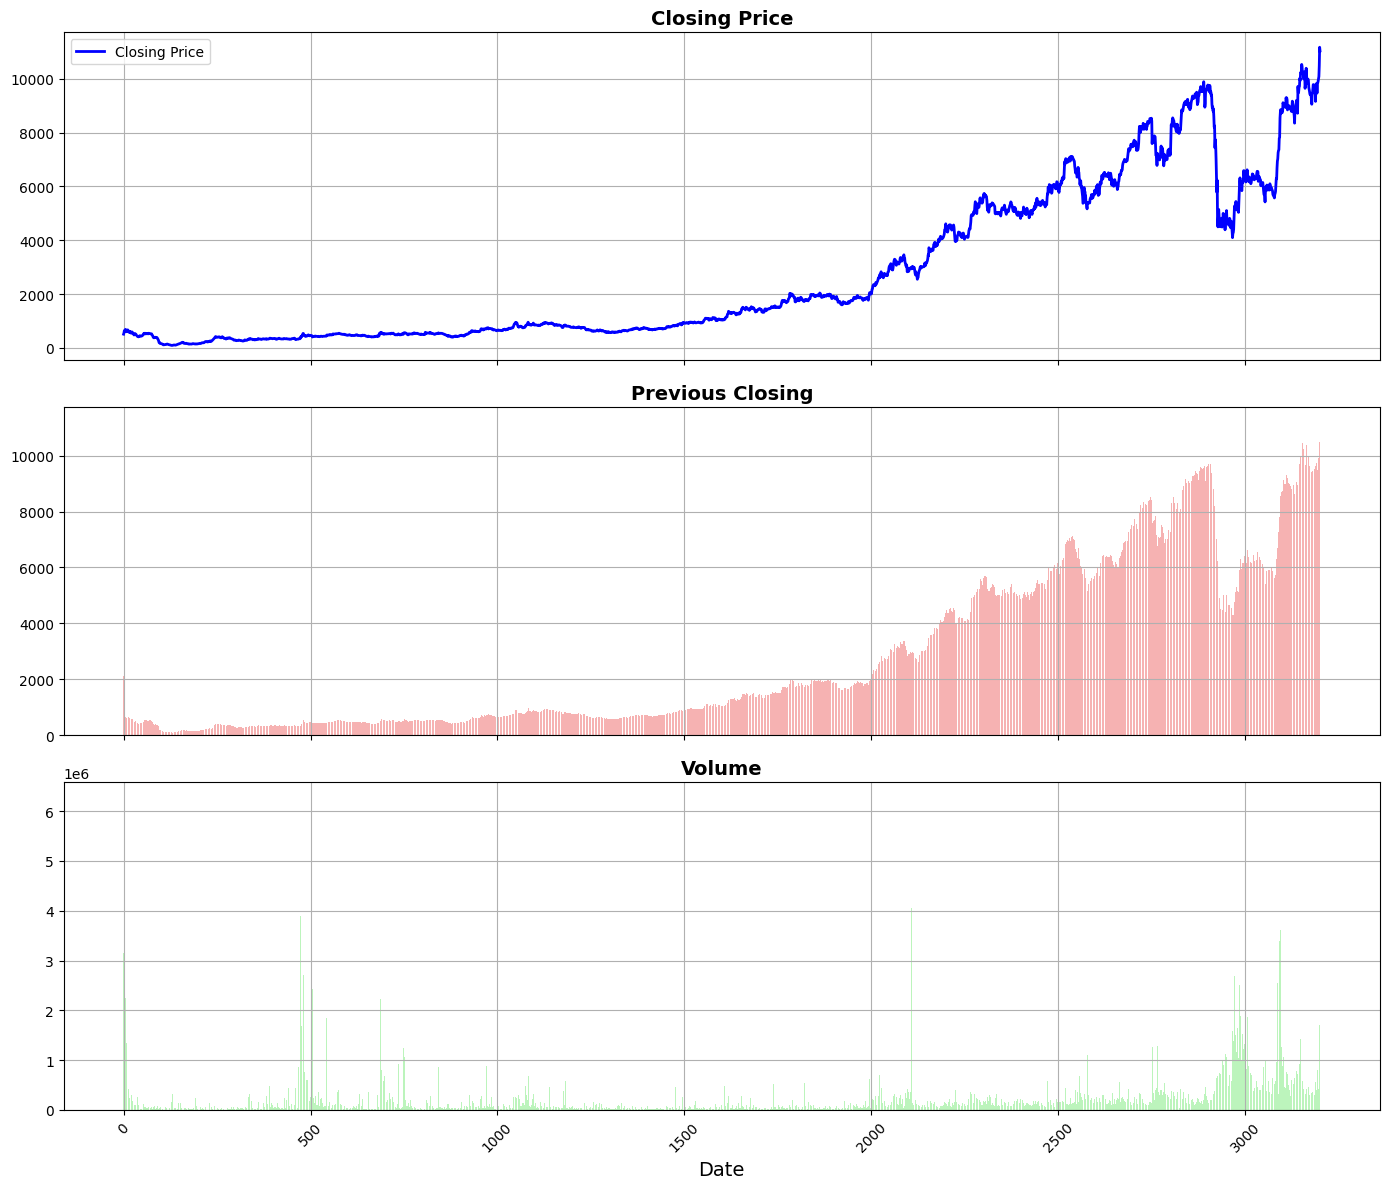

In [41]:
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Closing Price
axs[0].plot(df.index, df['Close'], color='blue', label='Closing Price', linewidth=2)
axs[0].set_title('Closing Price', fontsize=14, fontweight='bold')
axs[0].legend()
axs[0].grid()

# Previous Closing
axs[1].bar(df.index, df['Prev Close'], color='lightcoral', alpha=0.6)
axs[1].set_title('Previous Closing', fontsize=14, fontweight='bold')
axs[1].grid()

# Volume
axs[2].bar(df.index, df['Volume'], color='lightgreen', alpha=0.6)
axs[2].set_title('Volume', fontsize=14, fontweight='bold')
axs[2].grid()

# Set the x-axis label to 'Date', rotate tick labels for better readability, adjust layout for spacing, and display the plot
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

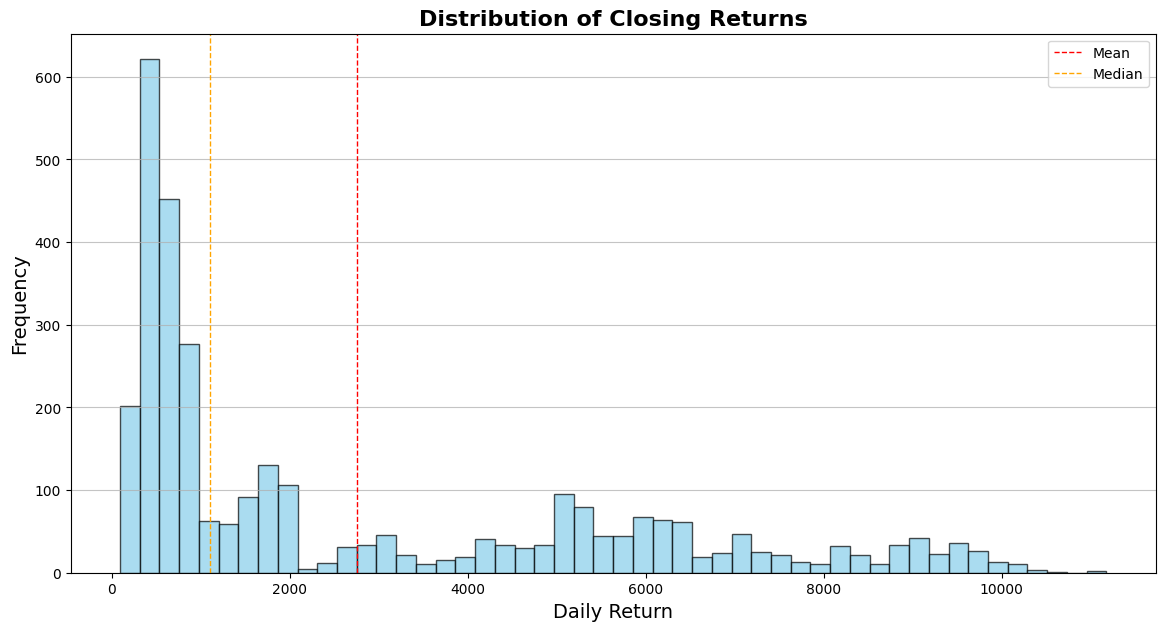

In [42]:
# Create a histogram of the closing prices with mean and median lines, labeled axes, and a grid for clarity
plt.figure(figsize=(14, 7))
plt.hist(df['Close'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Closing Returns', fontsize=16, fontweight='bold')
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(df['Close'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['Close'].median(), color='orange', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

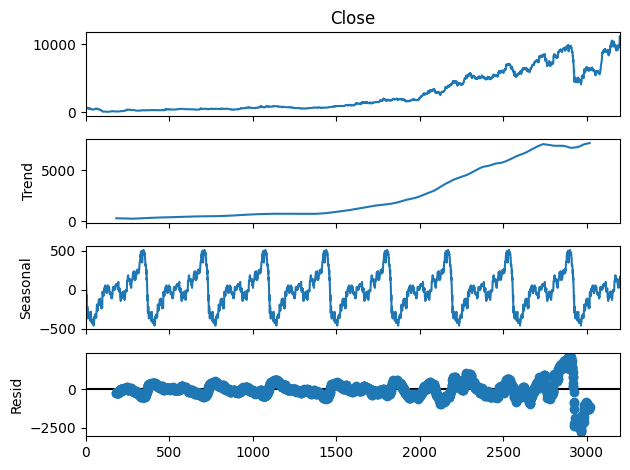

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Close'].dropna(), model='additive', period=365)
result.plot()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary")
        
# Example (assuming 'Close' column exists)
check_stationarity(df['Close'])

ADF Statistic: 0.565352
p-value: 0.986730
Data is non-stationary


In [14]:
# Seasonal differencing (assuming monthly data)
seasonal_diff = df['Close'] - df['Close'].shift(7)

# Drop NaN values that arise from differencing
seasonal_diff = seasonal_diff.dropna()

# Perform ADF test again on differenced data
result_diff = adfuller(seasonal_diff)

# Output the results of the seasonal differencing
print('ADF Statistic (seasonally differenced):', result_diff[0])
print('p-value (seasonally differenced):', result_diff[1])
check_stationarity(seasonal_diff)

ADF Statistic (seasonally differenced): -7.7321755986593494
p-value (seasonally differenced): 1.1178342376683848e-11
ADF Statistic: -7.732176
p-value: 0.000000
Data is stationary


In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller


ADF Statistic: 0.5653524010639496
p-value: 0.9867297500676576


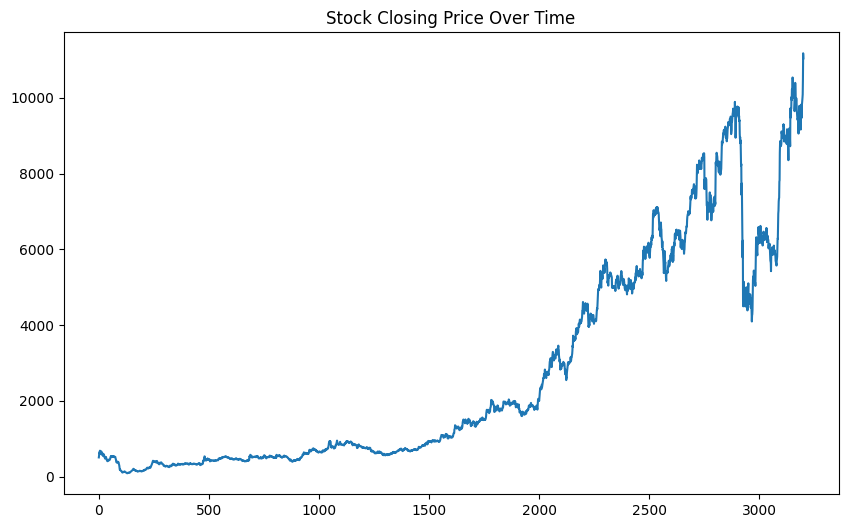

In [16]:
# We'll use the 'Close' price for forecasting
time_series = df['Close']

# Check if the data is stationary (using Augmented Dickey-Fuller test)
result = adfuller(time_series.dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value > 0.05, the data is non-stationary, so differencing might be required
# Plot the time series data
time_series.plot(title='Stock Closing Price Over Time', figsize=(10, 6))
plt.show()

In [17]:
# Define SARIMA model (p, d, q)(P, D, Q, S) 
# (p,d,q): ARIMA terms, (P,D,Q,S): seasonal terms, where S is the seasonal period
# For example, we'll set p=1, d=1, q=1 for ARIMA, and P=1, D=1, Q=1 with seasonal period S=12 (monthly seasonality)

model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
sarima_model = model.fit(disp=False)

# Print the summary of the model
print(sarima_model.summary())

# Forecast for the next 12 periods (e.g., months)
forecast = sarima_model.forecast(steps=12)

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3201
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -18976.081
Date:                            Mon, 14 Oct 2024   AIC                          37962.162
Time:                                    22:28:44   BIC                          37992.497
Sample:                                         0   HQIC                         37973.040
                                           - 3201                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9326      0.018     50.833      0.000       0.897       0.969
ma.L1         -0.9022      0.021   

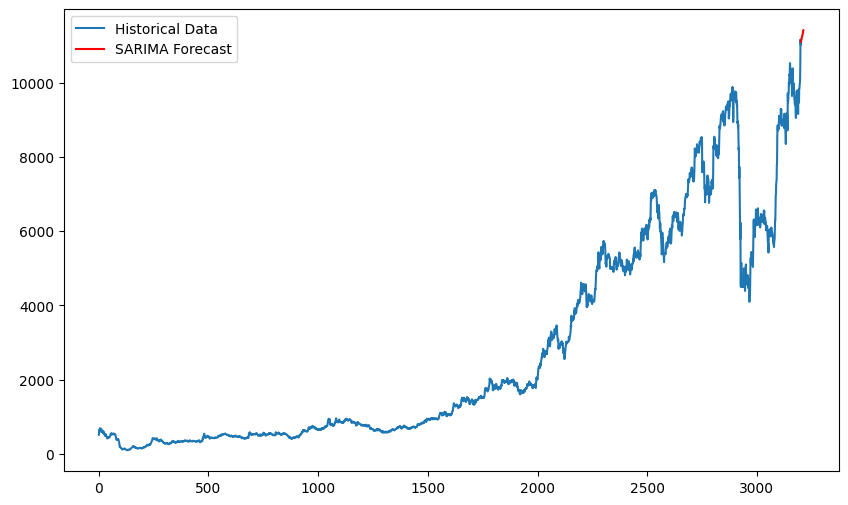

In [18]:
# Plot the forecast along with the historical data
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, label='Historical Data')
plt.plot(forecast.index, forecast, label='SARIMA Forecast', color='red')
plt.legend()
plt.show()

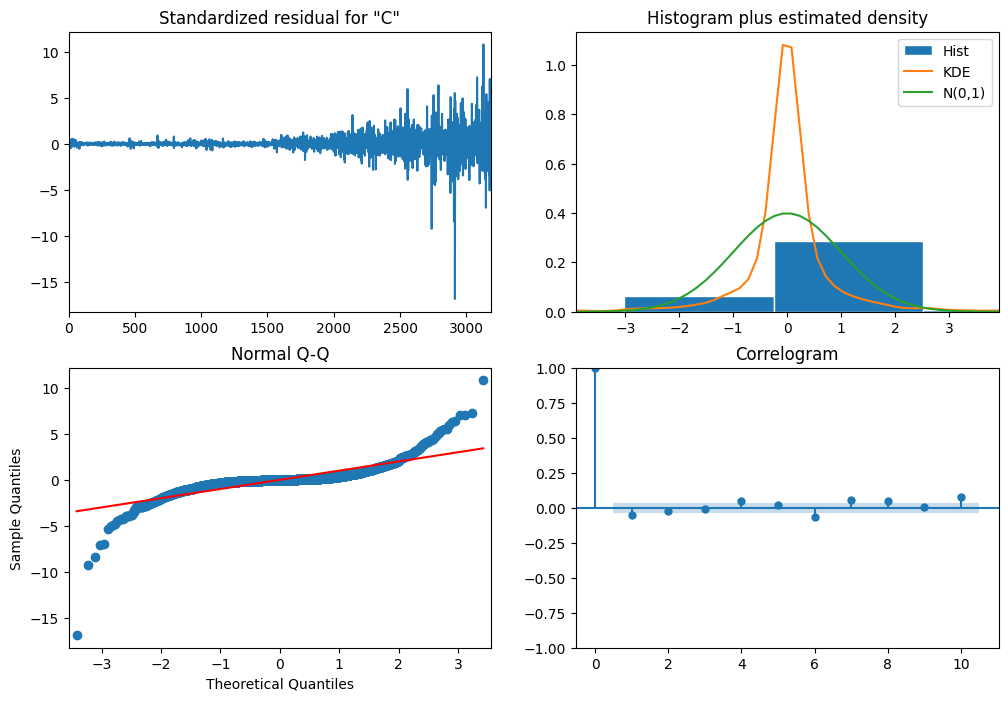

In [19]:
# Optionally, plot diagnostics to check the model
sarima_model.plot_diagnostics(figsize=(12, 8))
plt.show()

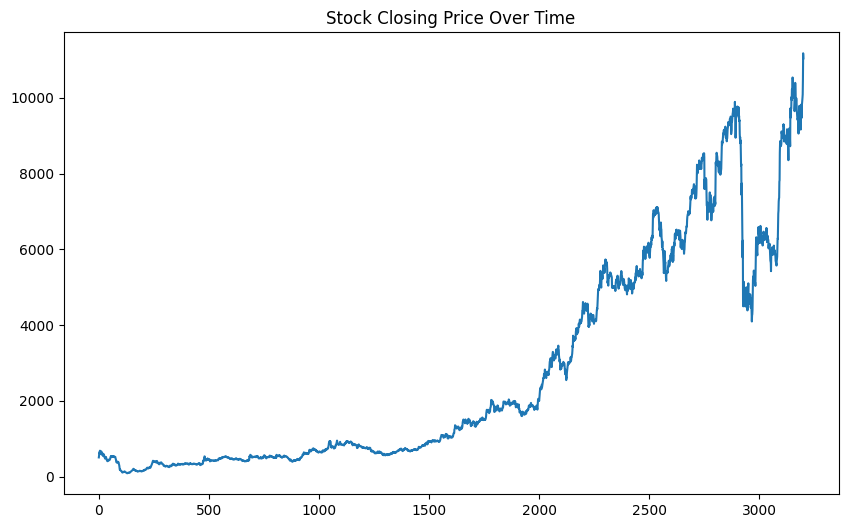

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# We'll use the 'Close' price for forecasting
time_series = df['Close']

# Plot the time series data
time_series.plot(title='Stock Closing Price Over Time', figsize=(10, 6))
plt.show()


c:\Users\id\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


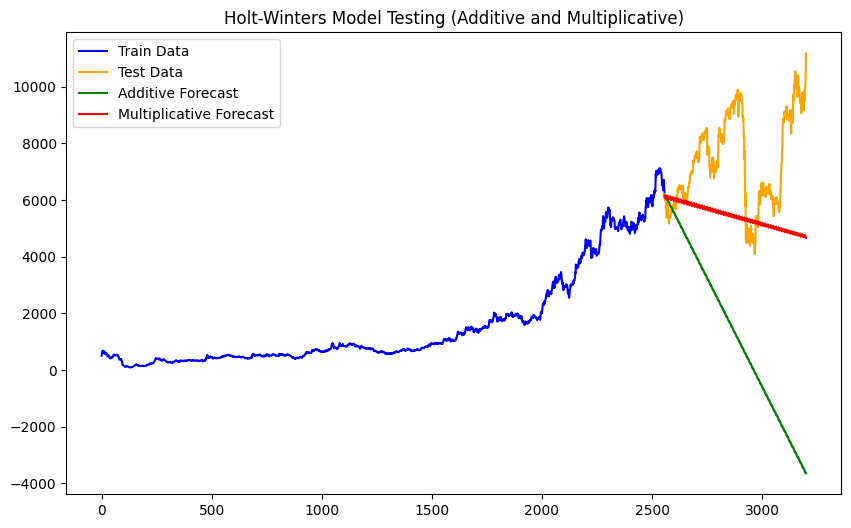

Additive Model - Mean Squared Error: 51328967.907
Multiplicative Model - Mean Squared Error: 7121620.042
       Actual  Additive Forecast  Multiplicative Forecast
2560  6212.55        6161.247685              6154.465468
2561  5979.80        6141.736308              6098.280461
2562  6006.20        6118.602466              6047.224129
2563  5881.85        6131.663568              6053.395511
2564  5752.50        6122.899028              6052.047720
2565  5632.10        6109.051292              6079.240381
2566  5375.65        6086.445143              6107.092171
2567  5395.55        6081.419313              6135.312190
2568  5429.10        6054.247459              6134.150329
2569  5961.50        6029.848157              6140.139484
2570  5592.00        5996.102345              6142.535324
2571  5813.55        5995.952452              6154.813784


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Convert 'Close' to numeric and handle missing values
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Close'].fillna(df['Close'].mean(), inplace=True)

# Split data into training (80%) and test (20%) sets
train_size = int(len(df) * 0.8)
train = df['Close'][:train_size]
test = df['Close'][train_size:]

# Fit the Holt-Winters model on the training data
# Additive for seasonality and trend
hw_model_additive = ExponentialSmoothing(train, seasonal='add', trend='add', seasonal_periods=12).fit()
# Multiplicative for increasing/decreasing seasonality
hw_model_multiplicative = ExponentialSmoothing(train, seasonal='mul', trend='add', seasonal_periods=12).fit()

# Forecast for the same length as the test set
forecast_additive = hw_model_additive.forecast(steps=len(test))
forecast_multiplicative = hw_model_multiplicative.forecast(steps=len(test))

# Plot training, testing, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='orange')
plt.plot(test.index, forecast_additive, label='Additive Forecast', color='green')
plt.plot(test.index, forecast_multiplicative, label='Multiplicative Forecast', color='red')
plt.legend()
plt.title('Holt-Winters Model Testing (Additive and Multiplicative)')
plt.show()

# Evaluate the model performance using MSE and MAE
mse_additive = mean_squared_error(test, forecast_additive)
mae_additive = mean_absolute_error(test, forecast_additive)

mse_multiplicative = mean_squared_error(test, forecast_multiplicative)
mae_multiplicative = mean_absolute_error(test, forecast_multiplicative)

# Print performance metrics
print(f'Additive Model - Mean Squared Error: {mse_additive:.3f}')
print(f'Multiplicative Model - Mean Squared Error: {mse_multiplicative:.3f}')
# Display actual vs predicted values for additive model
predicted_vs_actual = pd.DataFrame({'Actual': test, 'Additive Forecast': forecast_additive, 'Multiplicative Forecast': forecast_multiplicative})

# Print predicted vs actual values
print(predicted_vs_actual.head(12))  # Show the first 12 predicted values

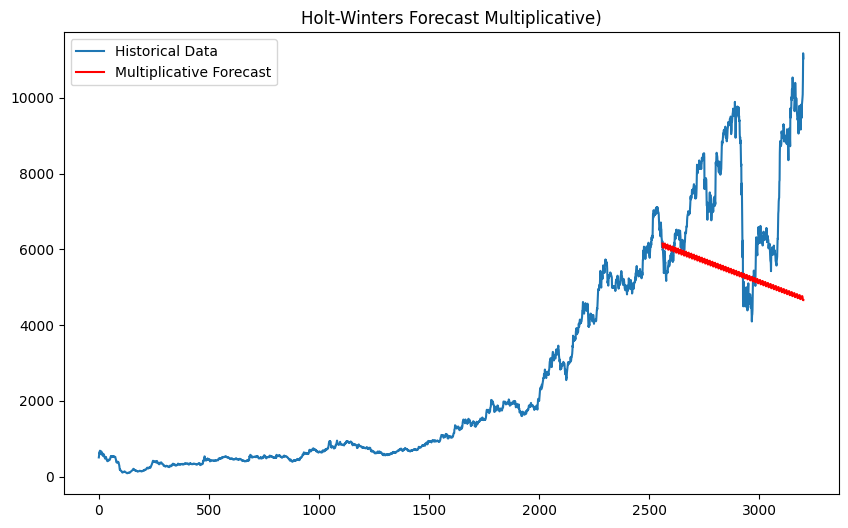

In [23]:
# Plot the historical data along with forecasts from both models
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, label='Historical Data')
plt.plot(forecast_multiplicative.index, forecast_multiplicative, label='Multiplicative Forecast', color='red')
plt.legend()
plt.title('Holt-Winters Forecast Multiplicative)')
plt.show()

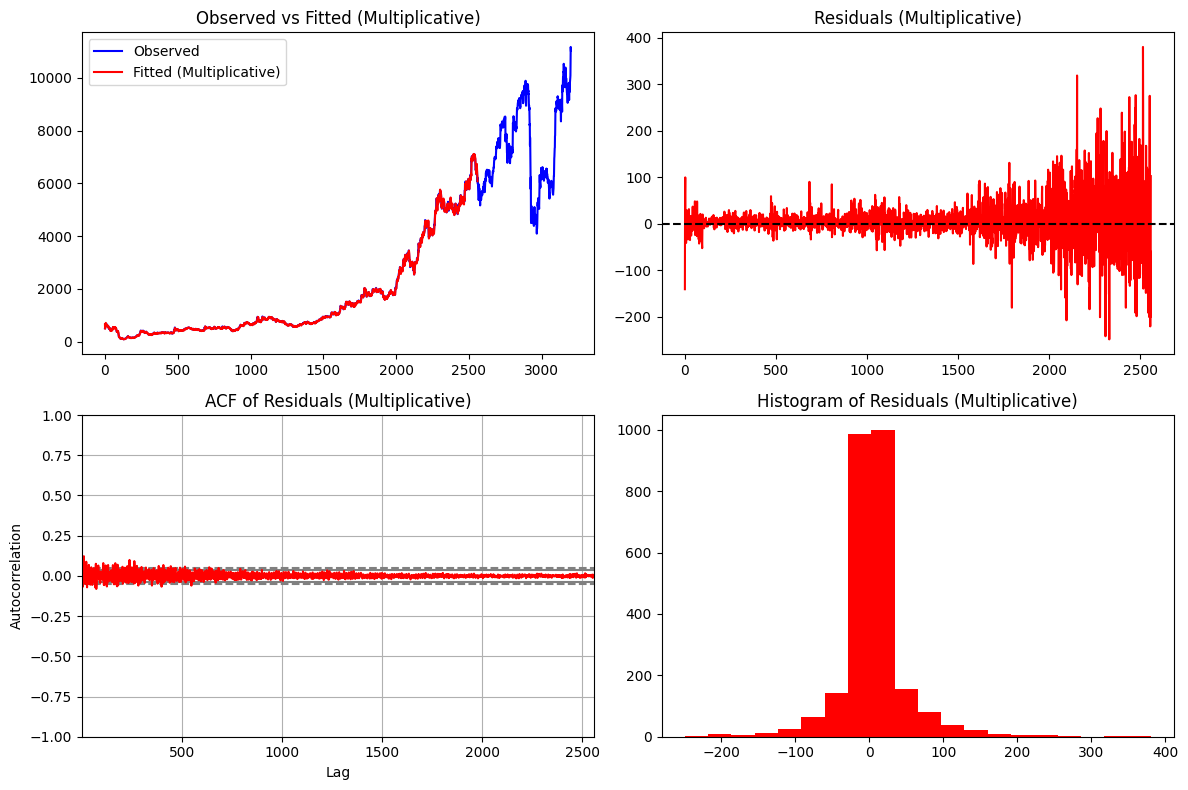

In [24]:
# Plot diagnostics for Holt-Winters model (Multiplicative)
plt.figure(figsize=(12, 8))

# Subplot 1: Observed vs Fitted
plt.subplot(2, 2, 1)
plt.plot(time_series, label='Observed', color='blue')
plt.plot(hw_model_multiplicative.fittedvalues, label='Fitted (Multiplicative)', color='red')
plt.legend()
plt.title('Observed vs Fitted (Multiplicative)')

# Subplot 2: Residuals
plt.subplot(2, 2, 2)
residuals_multiplicative = time_series - hw_model_multiplicative.fittedvalues
plt.plot(residuals_multiplicative, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals (Multiplicative)')

# Subplot 3: ACF of Residuals
plt.subplot(2, 2, 3)
pd.plotting.autocorrelation_plot(residuals_multiplicative.dropna(), color='red')
plt.title('ACF of Residuals (Multiplicative)')

# Subplot 4: Distribution of Residuals
plt.subplot(2, 2, 4)
plt.hist(residuals_multiplicative.dropna(), bins=20, color='red')
plt.title('Histogram of Residuals (Multiplicative)')

plt.tight_layout()
plt.show()

In [25]:
# Select 'Close' column for prediction
data = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the training data (60 time steps)
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [26]:
# Split into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [27]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


c:\Users\id\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 121ms/step - loss: 0.0076 - val_loss: 0.0034
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 4.9402e-04 - val_loss: 0.0018
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 4.7938e-04 - val_loss: 0.0027
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 5.2327e-04 - val_loss: 0.0051
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 4.3649e-04 - val_loss: 0.0016
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 4.6963e-04 - val_loss: 0.0016
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 3.5777e-04 - val_loss: 0.0070
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 4.3069e-04 - val_loss: 0.0014
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 3.8112e-04 - val_loss: 0.0023
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 3.7514e-04 - val_loss: 0.0015
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 114ms/step - loss: 2.9240e-04 - val_loss: 0.0021
Epoch 12/

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step


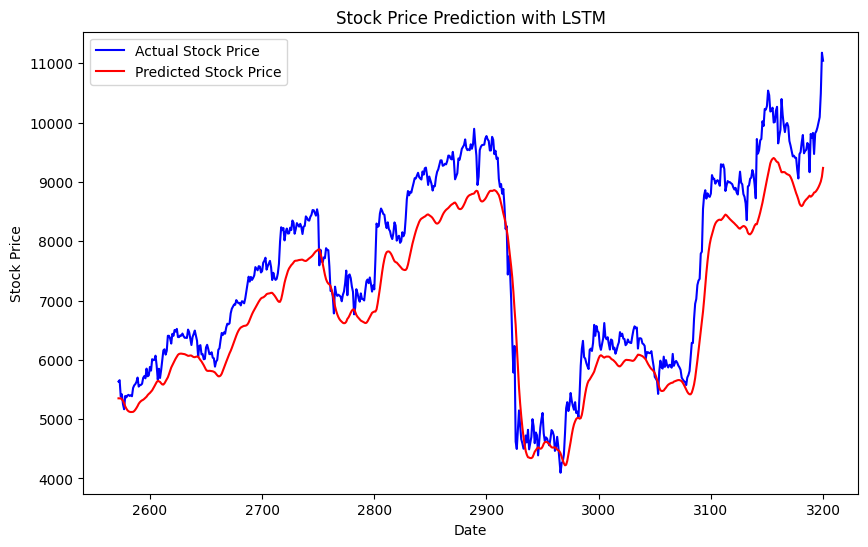

In [28]:
# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y_test):], data[-len(y_test):], color='blue', label='Actual Stock Price')
plt.plot(df.index[-len(y_test):], predicted_prices, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import r2_score

# 1. SARIMA Model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit(disp=False)
sarima_forecast = sarima_model.forecast(steps=len(test))
sarima_r2 = r2_score(test, sarima_forecast)

# 2. Holt-Winters Model (Additive and Multiplicative)
hw_model_multiplicative = ExponentialSmoothing(train, seasonal='mul', trend='add', seasonal_periods=12).fit()
hw_multiplicative_forecast = hw_model_additive.forecast(steps=len(test))
hw_multiplicative_r2 = r2_score(test, hw_multiplicative_forecast)


# 3. LSTM Model
lstm_predicted_prices = model.predict(X_test)
lstm_predicted_prices = scaler.inverse_transform(lstm_predicted_prices)

# Ensure the test and predictions are of the same length
test_values = test[:len(lstm_predicted_prices)]

lstm_r2 = r2_score(test_values, lstm_predicted_prices)

# Print R² (accuracy) for all models
print(f'SARIMA Model R² Score: {sarima_r2}')
print(f'Holt-Winters Multiplicative Model R² Score: {hw_multiplicative_r2}')
print(f'LSTM Model R² Score: {lstm_r2}')

# Find and print the best model based on the highest R² score
models_r2 = {'SARIMA': sarima_r2, 'HW Multiplicative': hw_multiplicative_r2, 'LSTM': lstm_r2}
best_model_name = max(models_r2, key=models_r2.get)
print(f'Best Model: {best_model_name} with R² Score: {models_r2[best_model_name]}')


c:\Users\id\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
SARIMA Model R² Score: 0.012149357446440412
Holt-Winters Multiplicative Model R² Score: -18.575508503876414
LSTM Model R² Score: 0.8587864068632632
Best Model: LSTM with R² Score: 0.8587864068632632


C:\Users\id\AppData\Local\Temp\ipykernel_10356\2126823929.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
c:\Users\id\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - loss: 0.0125 - val_loss: 0.0023
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 5.8260e-04 - val_loss: 0.0033
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - loss: 4.9930e-04 - val_loss: 0.0045
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - loss: 4.6891e-04 - val_loss: 0.0039
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 4.1101e-04 - val_loss: 0.0019
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 4.0002e-04 - val_loss: 0.0023
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - loss: 5.0377e-04 - val_loss: 0.0019
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - loss: 3.5909e-04 - val_loss: 0.0020
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - loss: 3.3880e-04 - val_loss: 0.0022
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - loss: 3.9562e-04 - val_loss: 0.0021
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - loss: 3.3796e-04 - val_loss: 0.0017
Epoc

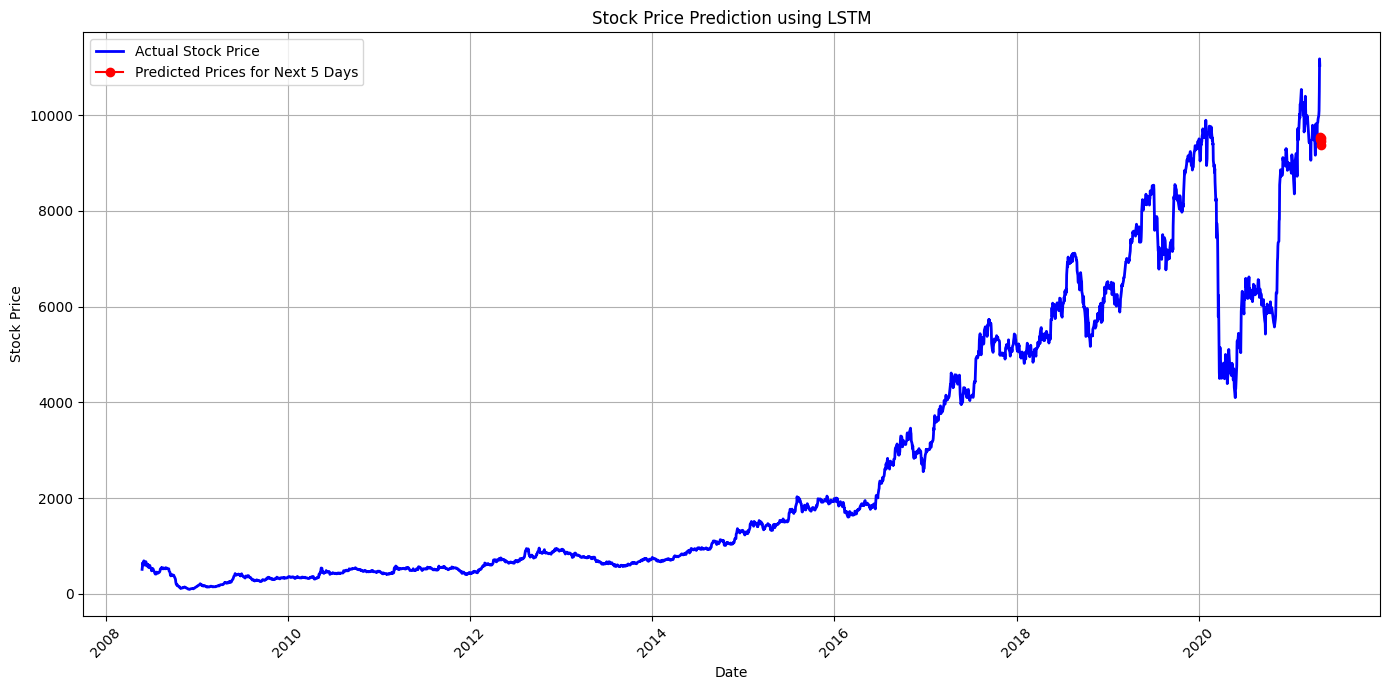

Predicted Stock Prices for the Next 5 Days:
Day 1: 9492.53
Day 2: 9535.24
Day 3: 9520.52
Day 4: 9464.84
Day 5: 9382.07


In [29]:

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Preprocess data
data = df[['Close']].values  # Use 'Close' prices for prediction
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the dataset for LSTM
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

# Create dataset
time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

# Split into training and testing data
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict the test set
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Predict the next 5 days
last_60_days = df['Close'][-60:].values
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Prepare input for LSTM model
X_input = []
X_input.append(last_60_days_scaled)
X_input = np.array(X_input)
X_input = np.reshape(X_input, (X_input.shape[0], X_input.shape[1], 1))

# Predict the next 5 days
predicted_next_5_days_scaled = []
for i in range(5):
    next_day_pred = model.predict(X_input)
    predicted_next_5_days_scaled.append(next_day_pred[0][0])
    
    # Update the input to include the new predicted value (shift the window)
    X_input = np.append(X_input[:, 1:, :], [[next_day_pred[0]]], axis=1)

# Inverse transform the predictions back to the original scale
predicted_next_5_days = scaler.inverse_transform(np.array(predicted_next_5_days_scaled).reshape(-1, 1))

# Create index for the next 5 days
last_date = df.index[-1]
next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=5)  # Get next 5 days

# Plotting
plt.figure(figsize=(14, 7))

# Plot actual prices
plt.plot(df.index, df['Close'], color='blue', label='Actual Stock Price', linewidth=2)

# Plot predicted prices for the next 5 days
plt.plot(next_dates, predicted_next_5_days, marker='o', color='red', label='Predicted Prices for Next 5 Days')

# Additional graph settings
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()

# Show plot
plt.show()

# Print the predicted prices for the next 5 days
print("Predicted Stock Prices for the Next 5 Days:")
for i, price in enumerate(predicted_next_5_days, 1):
    print(f"Day {i}: {price[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted Stock Prices for the Next 5 Days:
Day 1: 9492.53
Day 2: 9535.24
Day 3: 9520.52
Day 4: 9464.84
Day 5: 9382.07


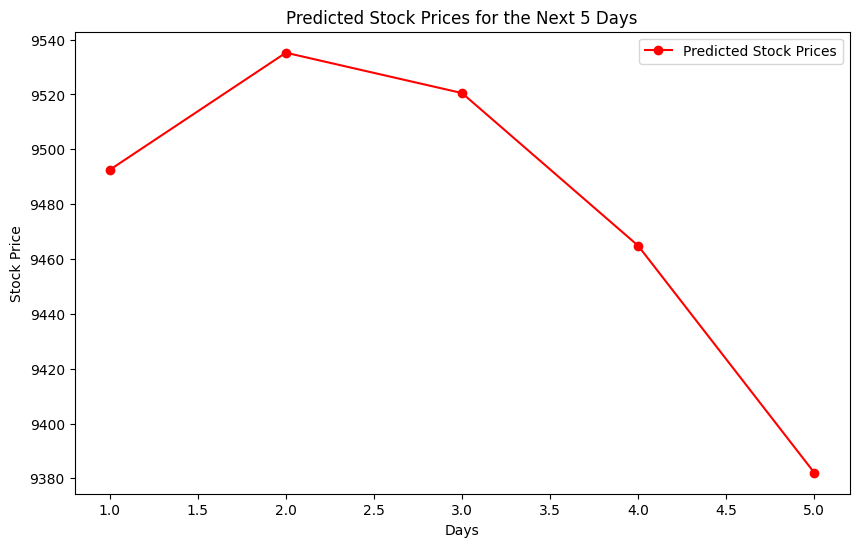

In [30]:
# Assuming your LSTM model is already trained and scaler is available

# Get the last 60 days of data from the dataset (as the LSTM uses 60 time steps)
last_60_days = df['Close'][-60:].values  # Replace 'df' with your actual dataset
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Prepare input for LSTM model
X_input = []
X_input.append(last_60_days_scaled)
X_input = np.array(X_input)

# Reshape input for LSTM model
X_input = np.reshape(X_input, (X_input.shape[0], X_input.shape[1], 1))

# Predict the next 5 days
predicted_next_5_days_scaled = []
for i in range(5):
    next_day_pred = model.predict(X_input)
    predicted_next_5_days_scaled.append(next_day_pred[0][0])
    
    # Update the input to include the new predicted value (shift the window)
    X_input = np.append(X_input[:, 1:, :], [[next_day_pred[0]]], axis=1)

# Inverse transform the predictions back to the original scale
predicted_next_5_days = scaler.inverse_transform(np.array(predicted_next_5_days_scaled).reshape(-1, 1))

# Print the predicted prices for the next 5 days
print("Predicted Stock Prices for the Next 5 Days:")
for i, price in enumerate(predicted_next_5_days, 1):
    print(f"Day {i}: {price[0]:.2f}")

# Plot the results (optional)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6), predicted_next_5_days, marker='o', color='red', label='Predicted Stock Prices')
plt.title('Predicted Stock Prices for the Next 5 Days')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
